# Loading and Verifying the two datasets

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [1]:
mohler_joined_path = "./mohler_joined.csv"
expand_path = "./expand.txt"

if not os.path.exists(mohler_joined_path):
    raise Exception("File not found error : mohler_joined.csv")

if not os.path.exists(expand_path):
    raise Exception("File not found : expand.txt")


mohler_df = pd.read_csv(mohler_joined_path, index_col=0)
expand_df = pd.read_csv(expand_path, header=None, sep = ",", names=["question", "refanswer", "answer", "score_avg"])

display(mohler_df.head())
display(expand_df.head())


,id,question,refanswer,answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0,3.0


,question,refanswer,answer,score_avg
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To find problem and errors in a program before...,2.0
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To address major issues in the creation of the...,2.5


# Checking For Missing values

In [2]:
mohler_df.isna().sum(axis=0)

id             0
question       0
refanswer      0
answer         0
score_me       0
score_other    0
score_avg      0
dtype: int64

In [3]:
expand_df.isna().sum(axis=0)

question     0
refanswer    0
answer       0
score_avg    0
dtype: int64

# Pre-processing 1: Rounding to nearest integer

In [5]:
mohler_df["rounded_score"] = round(mohler_df["score_avg"])
expand_df["rounded_score"] = round(expand_df["score_avg"])

In [6]:
display(mohler_df.head())
display(expand_df.head())

,id,question,refanswer,answer,score_me,score_other,score_avg,rounded_score
0,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.0,3.5,4.0
1,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.0,4.0,4.0
3,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0,3.0,3.0


,question,refanswer,answer,score_avg,rounded_score
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,3.5,4.0
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,4.0
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To find problem and errors in a program before...,2.0,2.0
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To address major issues in the creation of the...,2.5,2.0


# Merging the two datasets

In [7]:
# Looking for common rows
pd.merge(mohler_df[["question", "refanswer", "answer", "score_avg", "rounded_score"]], expand_df, on='question', how='inner')

,question,refanswer_x,answer_x,score_avg_x,rounded_score_x,refanswer_y,answer_y,score_avg_y,rounded_score_y


In [8]:
combined_df = pd.concat([mohler_df[["question", "refanswer", "answer", "score_avg", "rounded_score"]], expand_df], axis=0)
combined_df.drop("score_avg", axis=1, inplace=True)
display(combined_df)

,question,refanswer,answer,rounded_score
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0
...,...,...,...,...
3641,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,a queue,5.0
3642,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,Queue,5.0
3643,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,i would say that a queue is better because the...,5.0
3644,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,a queue because you want the jobs to execute i...,5.0


# Pre-processing 2: Mapping string descriptor to numeric scores

In [9]:
# Mapping integer scores to string descriptors
score_mapping = {
    0: 'Incorrect',
    1: 'Poor',
    2: 'Fair',
    3: 'Adequate',
    4: 'Good',
    5: 'Excellent'
}

combined_df['ScoreDescription'] = combined_df['rounded_score'].map(score_mapping)


In [10]:
combined_df

,question,refanswer,answer,rounded_score,ScoreDescription
0,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,Good
1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,Excellent
2,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,4.0,Good
3,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,Excellent
4,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,Adequate
...,...,...,...,...,...
3641,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,a queue,5.0,Excellent
3642,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,Queue,5.0,Excellent
3643,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,i would say that a queue is better because the...,5.0,Excellent
3644,What data structure is more appropriate for sc...,a queue otherwise some things would never be p...,a queue because you want the jobs to execute i...,5.0,Excellent


# Saving the combined file

In [11]:
combined_df.to_csv('combined_string_scoring.csv')

# Data Exploration

In [13]:
print("Total number of unique rows in the data : ", combined_df.shape[0])
print("Total number of unique questions in the data : ", combined_df["question"].nunique())
print("Total number of unique answers in the data : ", combined_df["answer"].nunique())

Total number of unique rows in the data :  5919
Total number of unique questions in the data :  164
Total number of unique answers in the data :  4110


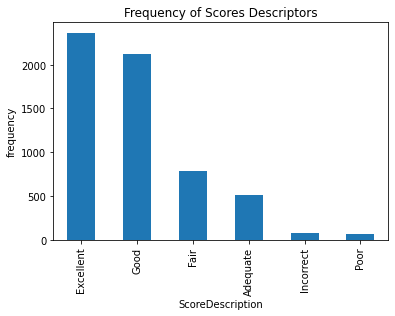

In [17]:
combined_df["ScoreDescription"].value_counts().plot(kind="bar", title="Frequency of Scores Descriptors", ylabel="frequency")
plt.show()


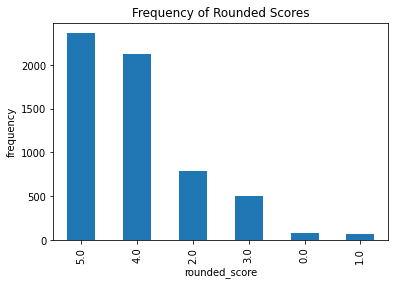

In [18]:
combined_df["rounded_score"].value_counts().plot(kind="bar", title="Frequency of Rounded Scores", ylabel="frequency")
plt.show()

<Axes: title={'center': 'Frequency of Fine-grained Scores'}, xlabel='score_avg', ylabel='frequency'>

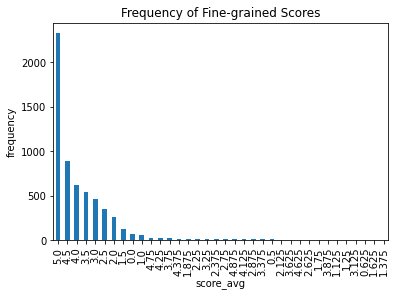

In [19]:
combined_df_2 = pd.concat([mohler_df, expand_df], axis=0)
combined_df_2["score_avg"].value_counts().plot(kind="bar", title="Frequency of Fine-grained Scores", ylabel="frequency")

# Data Sources:
- https://github.com/wuhan-1222/ASAG/blob/main/ASAG%20Method/dataset/NorthTexasDataset/expand.txt
- https://github.com/Ganesamanian/Computer-Assisted-Short-Answer-Grading-with-Rubrics-using-Active-Learning/blob/master/Dataset/mohler_joined.csv